In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('cricketers.csv', sep='\t', lineterminator='\n')
data.head()

,PLAYER,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
0,Aaron Finch,10,9,134,46,100,16.75,144.00,0,0.0,0,0,0.0,0.0
1,AB de Villiers,12,11,480,90,275,53.33,174.54,0,0.0,0,0,0.0,0.0
2,Abhishek Sharma,3,3,63,46,33,63.00,190.90,0,0.0,0,0,0.0,0.0
3,Ajinkya Rahane,15,14,370,65,313,28.46,118.21,0,0.0,0,0,0.0,0.0
4,Alex Hales,6,6,148,45,118,24.66,125.42,0,0.0,0,0,0.0,0.0


## 1.Normalizing the data using MinMaxScalar

In [3]:
from sklearn import preprocessing

In [4]:
#Removing Player column to apply MinMaxScalar
normData = data.drop(['PLAYER'], axis=1)

In [6]:
scalar = preprocessing.MinMaxScaler().fit_transform(normData)
normalize_Data = pd.DataFrame(scalar)
normalize_Data.columns = normData.columns
normalize_Data.head()

C:\Users\pkavya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
0,0.588235,0.529412,0.182313,0.359375,0.193798,0.220889,0.480000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.705882,0.647059,0.653061,0.703125,0.532946,0.703284,0.581800,0.0,0.0,0.0,0.0,0.0,0.0
2,0.176471,0.176471,0.085714,0.359375,0.063953,0.830806,0.636333,0.0,0.0,0.0,0.0,0.0,0.0
3,0.882353,0.823529,0.503401,0.507812,0.606589,0.375313,0.394033,0.0,0.0,0.0,0.0,0.0,0.0
4,0.352941,0.352941,0.201361,0.351562,0.228682,0.325201,0.418067,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#Rounding all the float values to 3
normalize_Data = normalize_Data.round(3)
normalize_Data.head()

,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
0,0.588,0.529,0.182,0.359,0.194,0.221,0.480,0.0,0.0,0.0,0.0,0.0,0.0
1,0.706,0.647,0.653,0.703,0.533,0.703,0.582,0.0,0.0,0.0,0.0,0.0,0.0
2,0.176,0.176,0.086,0.359,0.064,0.831,0.636,0.0,0.0,0.0,0.0,0.0,0.0
3,0.882,0.824,0.503,0.508,0.607,0.375,0.394,0.0,0.0,0.0,0.0,0.0,0.0
4,0.353,0.353,0.201,0.352,0.229,0.325,0.418,0.0,0.0,0.0,0.0,0.0,0.0


## 2.Custom code for K-Means on average_runs and bowling_economy with K=2 

In [8]:
import matplotlib.pyplot as plt
import copy
import random as rd
%matplotlib inline

In [10]:
#Taking average runs and bowling economy into one dataframe
df = pd.DataFrame({
    'X': normalize_Data['average_runs'],
    'Y': normalize_Data.iloc[:,-1]
})

In [11]:
#Taking the values into X
X = df.iloc[1:].values

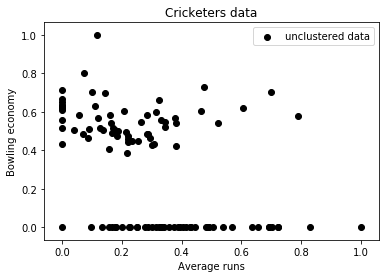

In [17]:
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('Average runs')
plt.ylabel('Bowling economy')
plt.legend()
plt.title('Cricketers data')
plt.show()

In [39]:
m=X.shape[0] #number of training examples
n=X.shape[1] #number of features. Here n=2
n_iter=100 #Let max iterations be 100

array([0.325, 0.   ])

In [63]:
#Calculating with K=2
K=2
Centroids=np.array([]).reshape(n,0) 
#selecting random values for Centroids
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]
Output={}
for i in range(n_iter):
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
           #Calculting Euclidean distance for each point and setting in tempDist variable
           tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
           EuclidianDistance=np.c_[EuclidianDistance,tempDist]
    C=np.argmin(EuclidianDistance,axis=1)+1 #labeling clusters as 1, 2
    Y={}
    #taking the output to temporary variable Y as dictionary object 1:[], 2:[]
    for k in range(K):
        Y[k+1]=np.array([]).reshape(2,0)
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]]

    for k in range(K):
        Y[k+1]=Y[k+1].T

    for k in range(K):
         Centroids[:,k]=np.mean(Y[k+1],axis=0)
    Output=Y

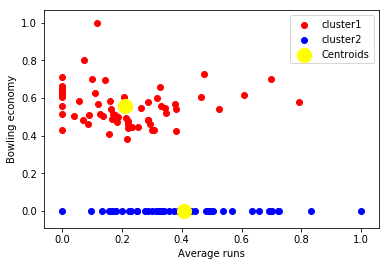

In [64]:
#After clustering the data points into 2 clusters it looks as below
color=['red','blue']
labels=['cluster1','cluster2']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=200,c='yellow',label='Centroids')
plt.xlabel('Average runs')
plt.ylabel('Bowling economy')
plt.legend()
plt.show()

## 3.Generalizing the above to fit for K=2,3,4,5

In [69]:
def KMeans(K, color, labels):
    Centroids=np.array([]).reshape(n,0) 
    #selecting random values for Centroids
    for i in range(K):
        rand=rd.randint(0,m-1)
        Centroids=np.c_[Centroids,X[rand]]
    Output={}
    for i in range(n_iter):
        EuclidianDistance=np.array([]).reshape(m,0)
        for k in range(K):
               #Calculting Euclidean distance for each point and setting in tempDist variable
               tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
               EuclidianDistance=np.c_[EuclidianDistance,tempDist]
        C=np.argmin(EuclidianDistance,axis=1)+1 #labeling clusters as 1, 2
        Y={}
        #taking the output to temporary variable Y as dictionary object 1:[], 2:[]
        for k in range(K):
            Y[k+1]=np.array([]).reshape(2,0)
        for i in range(m):
            Y[C[i]]=np.c_[Y[C[i]],X[i]]

        for k in range(K):
            Y[k+1]=Y[k+1].T

        for k in range(K):
             Centroids[:,k]=np.mean(Y[k+1],axis=0)
        Output=Y
    for k in range(K):
        plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
    plt.scatter(Centroids[0,:],Centroids[1,:],s=200,c='yellow',label='Centroids')
    plt.xlabel('Income')
    plt.ylabel('Number of transactions')
    plt.legend()
    plt.show()

In [24]:
OutputWith2 = KMeans(2)
OutputWith3 = KMeans(3)
OutputWith4 = KMeans(4)
OutputWith5 = KMeans(5)

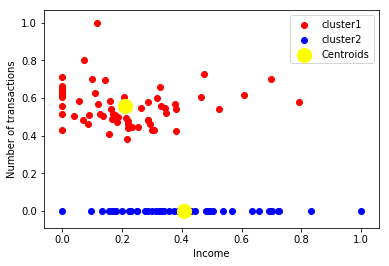

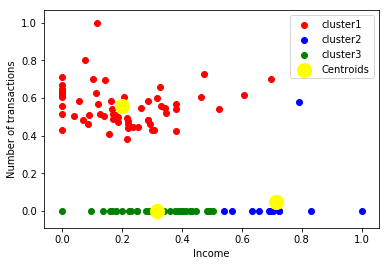

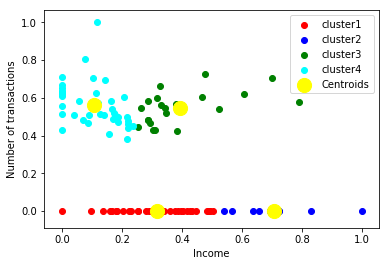

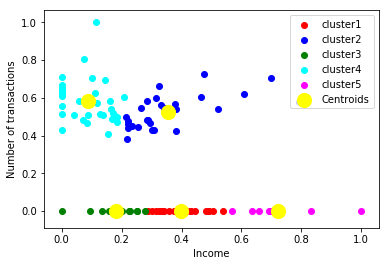

In [71]:
K=2
color=['red','blue']
labels=['cluster1','cluster2']
KMeans(K, color, labels)
K=3
color=['red','blue','green']
labels=['cluster1','cluster2','cluster3']
KMeans(K, color, labels)
K=4
color=['red','blue','green','cyan']
labels=['cluster1','cluster2','cluster3','cluster4']
KMeans(K, color, labels)
K=5
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
KMeans(K, color, labels)

K=2, has divided the cluster into two groups average runs and bowling economy. 

K=3, has divided the cluster into 3 groups as bowlers giving low average runs, high avereage runs and bowling economy. 

K=4, has divided the cluster into 3 groups as cricketers giving low average runs, high avereage runs, with low bowling economy and high bowling economy. 

K=5, has divided the cluster into 3 groups as cricketers giving low average runs, medium average runs, high avereage runs, with low bowling economy and high bowling economy. 

I think K=4 divides the groups perfectly and will be able to analyze the cricketers with this data